#### 데이터 로드 및 살펴 보기 
-  파일 정보

In [1]:
import pandas as pd

In [2]:
# 변수 설정 -> 고객 정보 컬럼 :아이디, 나이 ,성별, 직업 ,주소(우편번호)
cols = ['uid','age','sex','job','zip_code']
users = pd.read_csv( './ml-100k/u.user', sep='|', names = cols )
#cols =>  줄맞춤 
users.shape

(943, 5)

In [3]:
users.head()

,uid,age,sex,job,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
# 영화 정보 -> mid(무비 id)
# 영화 ID, 제목, 개봉일, 비디오 개봉일, imdb 주소
m_cols = ['mid','title','relese_date','video_relese_date','imdb_url']
movies = pd.read_csv('./ml-100k/u.item',sep='|',names = m_cols, encoding = 'latin 1', usecols = range(5))
movies.head(3)
# 실제 데이터에 컬럼이 많은데 , 앞에서부터  잘라서 작용하고 싶다. 

,mid,title,relese_date,video_relese_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...


In [5]:
movies.shape

(1682, 5)

- u.user : 고객 정보
- u.item : 영화 정보
- u.data : 평점 정보

In [6]:
# 평점정보 
ratings_cols  = ['uid','mid','rating','unix_timestamp']
ratings = pd.read_csv('./ml-100k/u.data', sep='\t', names=ratings_cols )
ratings.shape

(100000, 4)

In [7]:
ratings.head()

,uid,mid,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
# unix_timestamp -> 우리가 알수 있는 YYYY-MM-dd hh:mm:ss
# date라는 컬럼에 추가
ratings['date'] = pd.to_datetime(ratings['unix_timestamp'],unit ='s')

In [9]:
ratings.head()

,uid,mid,rating,unix_timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


#### 데이터 준비/ 시각화 / 통찰 

In [10]:
# 정보 병합 
# movies,ratings,users
# movies,ratings, => 병합 movies_ratings
movies_ratings = pd.merge( movies,ratings )
movies_ratings.head()

,mid,title,relese_date,video_relese_date,imdb_url,uid,rating,unix_timestamp,date
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088,1997-09-27 04:21:28
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411,1997-10-16 16:30:11
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426,1998-04-04 14:33:46
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324,1997-12-31 20:48:44


In [11]:
movies_ratings.shape

(100000, 9)

In [12]:
movie_lens = pd.merge( movies_ratings,users )
movie_lens.head()

,mid,title,relese_date,video_relese_date,imdb_url,uid,rating,unix_timestamp,date,age,sex,job,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,1998-02-17 17:51:30,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,1998-02-17 18:20:08,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,1998-02-17 18:07:27,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,1998-02-17 17:31:36,60,M,retired,95076


In [13]:
movie_lens.shape

(100000, 13)

In [14]:
#평가를 가장 많이 받은 작품 상위 10개 
movie_lens.title.value_counts()[:10]
# 인기가 아주 없는 영화는 빼고 (평점 특정 개수 이하는 제외),
# 보여지는 데이터를 기준으로 살펴보면 영화가 오래 걸릴수록 평가를 많이 받는경향이 보인다.

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64

In [15]:
movie_lens.title.value_counts()[-10:]

Modern Affair, A (1995)                                      1
To Cross the Rubicon (1991)                                  1
You So Crazy (1994)                                          1
August (1996)                                                1
Tokyo Fist (1995)                                            1
Window to Paris (1994)                                       1
Gate of Heavenly Peace, The (1995)                           1
I Don't Want to Talk About It (De eso no se habla) (1993)    1
Promise, The (Versprechen, Das) (1994)                       1
Bird of Prey (1996)                                          1
Name: title, dtype: int64

In [16]:
import numpy as np

In [17]:
# 제목기준으로 데이터가 나누는데, 평가의 개수, 평점평균을 포함한 데이터 프레임
# 인덱스에 title, 컬럼에 평가의 개수:size, 평점평균 :mean
# 피벗없이 수행 
# rating : 1차 레벨 컬럼,np.size, np.mean 2차 레벨의 컬럼
movie_state = movie_lens.groupby('title').agg({'rating':[np.size, np.mean]})
movie_state.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [18]:
# 평점을 받는 개수가 1개인 영화, 즉 소수의 평가를 받은 영화가 많다.
# 평균의 수가 적으면 노이즈가 개입되기 쉽다. 
# 일정 횟수 이상인경우 (여기서는 100 건 기준)만 대상으로 처리하겠다.

In [20]:
# 평가의 개수가 100개 이상인 데이터만 대상 추출 -> 블리언 인덱싱
best_100_over = movie_state['rating']['size'] >= 100

In [22]:
#오름 차순 정렬하시오 -> 평균기준
# 변수명 tmp
tmp = movie_state[best_100_over].sort_values( by=[('rating','mean')], ascending = False )
tmp.head()

rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230

In [23]:
tmp.tail()

rating          
                        size      mean
title                                 
Spawn (1997)             143  2.615385
Event Horizon (1997)     127  2.574803
Crash (1996)             128  2.546875
Jungle2Jungle (1997)     132  2.439394
Cable Guy, The (1996)    106  2.339623

In [24]:
tmp.shape

(338, 2)

In [25]:
# 간단한 시각화 
# 영화별 평점 개수 : X축
# 사용자별 평가 횟수 : Y축
from matplotlib import pyplot as plt

In [26]:
# 한글 처리 
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib', 'inline')

def initKoreaFontLoad() :
    plt.rcParams['axes.unicode_minus'] = False
    os_name = platform.system()
    
    if os_name == 'Darwin' :
        # MacOS, Linux
        rc('font', family = 'AppleGothic')
    elif os_name == 'Windows' :
        # window10 ~ window server
        path = 'c:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        print(font_name)
        rc('font', family = font_name)
    else :
        print('알 수 없는 시스템')
        pass
initKoreaFontLoad()

Malgun Gothic


In [ ]:
#%matplotlib inline

In [27]:
#사용자별 평점을 내린 개수 
movie_lens.groupby('uid').size()[:10]

uid
1     272
2      62
3      54
4      24
5     175
6     211
7     403
8      59
9      22
10    184
dtype: int64

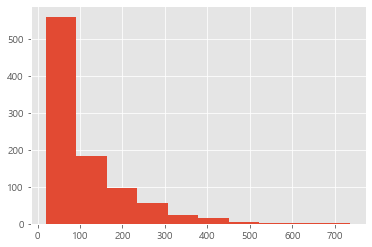

In [28]:
# 히스토그램 
plt.style.use('ggplot')
movie_lens.groupby('uid').size().sort_values( ascending=False ).hist()
# 빈도가 낮아지는 그래프 모양 -> 길게 꼬리를 늘어뜨리는 모양이다 -> 롱테일분포
#"지프의 법칙"을 따르는 굴곡 모양이다.
#자연어 말뭉치 표현에 나타나는 단어들을 그 사용빈도가 높은순으로 나열하면,
#모든 단어의 사용 빈도는 해당언어의 빈도 순위에 반비례한다.
#영화의 평가가 많으면, 그 사용들중에는 1회성 평가회수도 많다

In [34]:
# 사용자별 평가 회수, 평균 
user_state = movie_lens.groupby('uid').agg({'rating': [np.size, np.mean]})
user_state.head()

rating          
      size      mean
uid                 
1      272  3.610294
2       62  3.709677
3       54  2.796296
4       24  4.333333
5      175  2.874286

In [35]:
user_state.shape

(943, 2)

In [36]:
user_state['rating'].describe()
# 평균값 데이터를 보면, 최저 1.49점, 최대 4.87점, 25~75% 지점의 모두다 3점대에
# 머물러 있어서, 일반적으로 (평균적으로) 3.59정도는 받는다 (3점이상는 받는다)
# 3점이하는 진짜 영화가 아닌것이다.
# 최대 점수와 최저 점수는 편중된것으로 보인다

,size,mean
count,943.000000,943.000000
mean,106.044539,3.588191
std,100.931743,0.445233
min,20.000000,1.491954
25%,33.000000,3.323054
50%,65.000000,3.620690
75%,148.000000,3.869565
max,737.000000,4.869565


#### 인수분해 머신을 이용한 추천 시스템 구성

- 행렬 인수 분해라는 기능을 일반화한 알고리즘 -> 차원축소기법
- 회소 행렬을 다룰소 있는 알고리즘
- 특징끼리 영향을 주고 받는 상호 작용 개념을 계산에 적용이 가능
- 범주형 변수를 더미 변수(파생 변수)로 변환하여 범주간 상호 작용성도 계산 가능
- 알고리즘은 회귀, 분류, 학습등도 가능  
- C++로 만들어진 libFM이라는 알고리즘이 가장 유명 -> 파이썬으로 구성된 fastFM 

##### fastFM 제공 알고리즘
- ALS : 교대 최소 제곱법
 > 장점: 예측 시간 빠름, SGD보다 하이퍼파라이터가 작다  
 > 단점: 규제 반드시(필수)
- SGD : 확률적 경사하강법 
 > 장점: 예측 시간 빠름, 대규모 데이터(빅데이터)를 빠르게 학습할수 있다  
 > 단점: 규제 반드시(필수), 하이퍼파라이터가 많다  
- MCMC : 마르코프 연쇄 몬테카를로
 > 장점: 하이퍼파라이터가 작다. 자동 규제(알아서적용)
 > 단점: 학습 시간이 다소 느림

#### 도커 도입

- 사용하고자 하는 오픈소스 알고리즘(모듈)중에는 윈도우에서 수행이 불가능한 경우가 많다. 
- 도커를 이용하여 리눅스 생태계를 만들고, 거기서 fastFM 을 설치후 주피터를 연결하여 개발을 이어가겟다.

# 도커 설치 절차 
 1. 도커 가입 
     - [도커](https://www.docker.com)
     
 2. 도커다운로드 및 설치(윈도우용)
     - [윈도우 설치](https://www.docker.com/products/docker-desktop)
         - 다운로드 및 설치 850MB
 OR
     - [공식적으로 window 10 home 에디션 이하]
     - [Home 윈도우 설치](https://github.com/docker/toolbox/releases)
        - 다운로드및 설치
          (별도 체크박스 수정없이 다 긍정 및 확인 하면서 설치)
      
 3. 도커 콘솔 가동(docker desktop)
 ``` py
 $  docker version 
 ```
     
 4. 컨테이너 이미지 다운로드(도커 허브에서 다운로드)
 
 ```py
 $ docker pull ub:latest
 -> 네트워크가 않되는 사람( docker version 수행서 서버 접속 에러난 경우)
 $ dockerCli.exe -SwitchDaemon
 $ docker version
 -> 위에 명령 수행후확인 
 -> 그래도 않되면 도커툴 설치후 도커툴에서 진행
 ```
 OR
 
 ```py
 $ docker pull ubuntu:18.04
 ```
 5. 다운로드란 이미지 확인 
 
 ```py
 $ docker images
 ```
 6. 다운로드한 이미지 제거
 
 ```py
 $ docker rmi ubuntu:latest
     - 확인
 $ docker images
 ```
 7. 컨테이너 이미지를 이용하여 컨테이너 생성 및 로그인
  -> 단 포트는 컨테이너를 생성할때 단 한번 세팅이 가능
  
  ```py
    $ docker run -p 8888:8888 -p 8123:8123 --name ml -i -t ubuntu:latest /bin/bash
    => -p  인바운드포트:아웃바운트포트, 1회만 세팅, 필요한 만큼 추가
    => --name 컨테이너 인스턴스의 이름
    => -i(interactive), -t(Pseudo-tty) 이 옵션 추가하면 Bash shell에 
   입력 및 출력을 수행할수 있다
    => ubuntu:latest 설치할 이미지
    => /bin/bash는 커맨드 쉘의 한 종류, 이를 사용하기 위해 명령어 입력
  ```
  
 8. 리눅스에서 빠져나가기
 
 ```py
 root@$ exit
 ```
 
 9. 컨테이너 인스턴스의 목록
 
 ```py
 $ docker ps -a
 ```
 
 10. 컨테이너 인스턴스 가동
 
 ```py
 $ docker start ml
 $ docker ps -a
 ```
 
 11. 재가동
 
 ```py
 $ docker restart ml
 ```
 
 12. 접속
 
 ```py
 $ docker attach ml
 root@$ ...
 ```
 
 13. 리눅스는 나가서, 컨테이너 인스턴스 제거
 
 ```py
     root@$ exit
    $ docker rm ml
    $ docker ps -a
 ```
 

14. 리눅스상에서 환경 구축

```py
root@$ apt-get update && apt-get -y upgrade

-> https://github.com/ibayer/fastFM

- 패키지 설치
root@$ apt-get -y install python3-dev libopenblas-dev git python3-pip nano wget unzip

- fastFM 소스 다운로드
root@$ cd home
root@$ git clone --recursive https://github.com/ibayer/fastFM.git
root@$ cd fastFM    

- 파이썬 라이브러리 설치
root@$ pip3 install -r ./requirements.txt

- 빌드 -> 중간에이나 끝부분에 error 가 보일수도 있다(무시)
root@$ PYTHON=python3 make

- 패키지 설치
root@$ pip3 install .
root@$ python3
>>> from fastFM import als
>>> 
>>> exit()
root@$ pip3 install pandas matplotlib jupyter

- 주피터 노트북 가동
root@$ jupyter notebook --ip=0.0.0.0 --port=8123 --allow-root --no-browser
or 
root@$ jupyter notebook --ip=0.0.0.0 --allow-root ( 기본 포트 8888 )

- 기본 PC에서 브라우저 접속

[toolbox 사용자]
도커 구동시 IP를 사용
docker is configured to use the default machine with IP 192.168.99.100
http://192.168.99.100:8123/?token=c4a28a0fec6d6eff0d3d28a9a0d62838f5f7a188cdedf686

[일반 사용자]
http://127.0.0.1:8123/?token=c4a28a0fec6d6eff0d3d28a9a0d62838f5f7a188cdedf686

```

